In [34]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import librosa

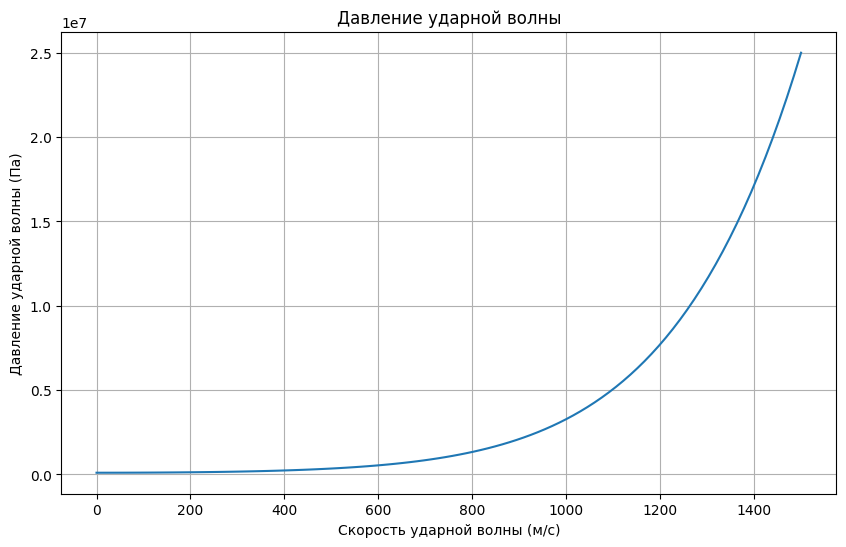

In [35]:

def shock_wave_pressure(P0, v, gamma=1.4, c0=343.0):
    """
    Рассчитывает давление ударной волны.

    Параметры:
    - P0: давление воздуха перед ударной волной (Па)
    - v: скорость ударной волны (м/с)
    - gamma: адиабатический индекс (по умолчанию 1.4 для воздуха)
    - c0: скорость звука в воздухе (м/с)

    Возвращает:
    - давление ударной волны (Па)
    """
    return P0 * (1 + ((gamma - 1) / 2) * (v / c0)**2)**(gamma / (gamma - 1))

# Параметры моделирования
P0 = 101325  # давление воздуха перед ударной волной (Па)
v_values = np.linspace(0, 1500, 100)  # значения скорости ударной волны (м/с)

# Рассчитываем давление ударной волны для различных значений скорости
shock_wave_pressures = [shock_wave_pressure(P0, v) for v in v_values]

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.plot(v_values, shock_wave_pressures)
plt.title('Давление ударной волны')
plt.xlabel('Скорость ударной волны (м/с)')
plt.ylabel('Давление ударной волны (Па)')
plt.grid(True)
plt.show()

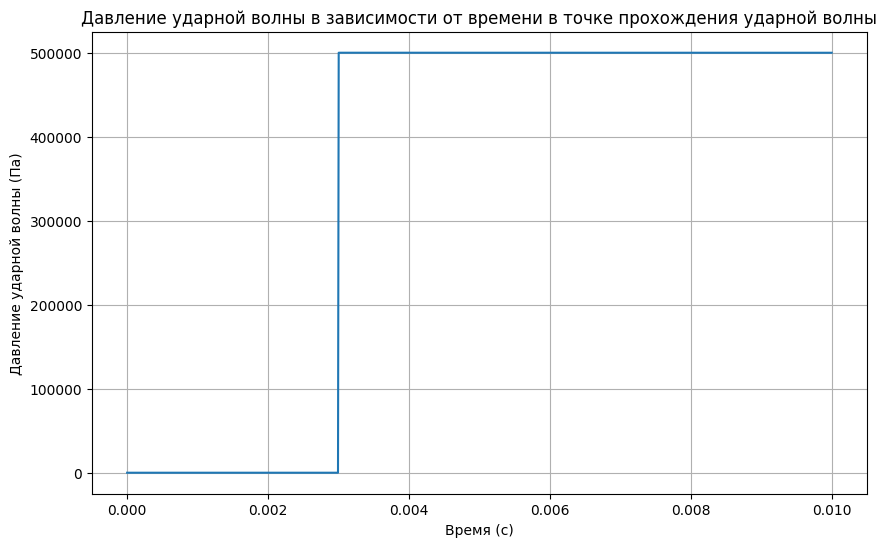

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def shock_wave_pressure(t, rho_air, v, t_peak, peak_pressure):
    """
    Рассчитывает давление ударной волны в зависимости от времени.

    Параметры:
    - t: время (с)
    - rho_air: плотность воздуха (кг/м^3)
    - v: скорость ударной волны (м/с)
    - t_peak: время, когда ударная волна достигает пика (с)
    - peak_pressure: максимальное давление ударной волны (Па)

    Возвращает:
    - давление ударной волны в момент времени t (Па)
    """
    # Расстояние, которое проходит ударная волна за время t_peak
    distance_to_peak = v * t_peak
    
    # Время, за которое ударная волна достигает точки t
    time_to_point = distance_to_peak / v
    
    # Если время t меньше времени до пика, давление равно нулю
    if t < time_to_point:
        return 0
    else:
        # Рассчитываем давление ударной волны
        decay_constant = 0.01  # Коэффициент затухания
        pressure_decay = peak_pressure * np.exp(-decay_constant * (t - time_to_point))
        return pressure_decay

# Параметры моделирования
t_values = np.linspace(0, 0.01, 1000)  # значения времени (с)
rho_air = 1.225  # плотность воздуха при нормальных условиях (кг/м^3)
v = 340  # скорость звука в воздухе при нормальных условиях (м/с)
t_peak = 0.003  # время, когда ударная волна достигает пика (с)
peak_pressure = 500000  # максимальное давление ударной волны (Па)

# Рассчитываем давление ударной волны для различных значений времени
shock_wave_pressures = [shock_wave_pressure(t, rho_air, v, t_peak, peak_pressure) for t in t_values]

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.plot(t_values, shock_wave_pressures)
plt.title('Давление ударной волны в зависимости от времени в точке прохождения ударной волны')
plt.xlabel('Время (с)')
plt.ylabel('Давление ударной волны (Па)')
plt.grid(True)
plt.show()


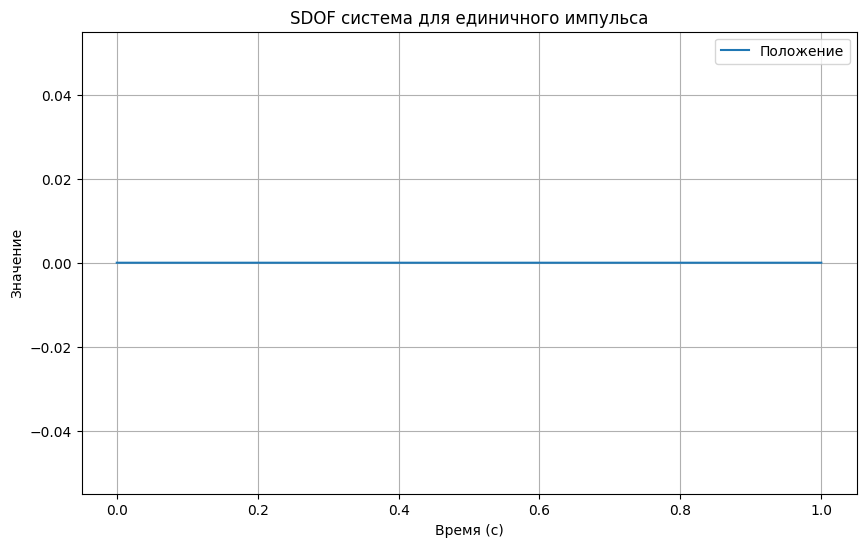

In [33]:


# Параметры системы

# Параметры для моделирования звуковой волны в воздухе
c_air = 343.0  # Скорость звука в воздухе (м/с)
rho_air = 1.225  # Плотность воздуха (кг/м^3) при комнатной температуре и нормальном атмосферном давлении
beta_air = rho_air * c_air**2  # Жесткость воздуха (Н/м^2)

# Параметры системы (используем параметры звуковой волны в воздухе)
m = 1.0   # Масса (кг)
k = beta_air  # Жесткость (Н/м)
c = 0.1 * rho_air * c_air  # Демпфер (Н*с/м) - можно выбрать произвольное значение
sample_rate=44100
# Функция для уравнения движения SDOF системы
def SDOF_equation(y, t, m, c, k, force):
    """
    y: массив состояния [положение, скорость]
    t: время
    m: масса
    c: демпфер
    k: жесткость
    force: внешняя сила
    """
    x, v = y  # Положение и скорость
    dxdt = v  # Производная положения по времени
    dvdt = (force(t) - c*v - k*x) / m  # Производная скорости по времени
    return [dxdt, dvdt]

# Функция для внешней силы (единичный импульс в момент времени t0)
def unit_impulse_force(t, t0=.2, dt=.01):
    if t>t0 and t<t0+dt:
        if t-t0<dt/2:
            return 1000.0
        else:   
            return -1000.0
    else:
        return 0.0

# Начальные условия
initial_state = [0, 0]  # Начальное положение и скорость
time = np.linspace(0, 1, sample_rate)  # Временные шаги
impulse_values = np.zeros_like(time)
for i, t in enumerate(time):
  impulse_values[i] = unit_impulse_force(t)
# Решение уравнения движения
solution = odeint(SDOF_equation, initial_state, time, args=(m, c, k, unit_impulse_force))

# Извлечение положения и скорости из решения
position = solution[:, 0]
velocity = solution[:, 1]

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(time, position, label='Положение')
# plt.plot(time, velocity, label='Скорость')
#plt.plot(time, impulse_values, label='Ударная сила')

plt.title('SDOF система для единичного импульса')
plt.xlabel('Время (с)')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()


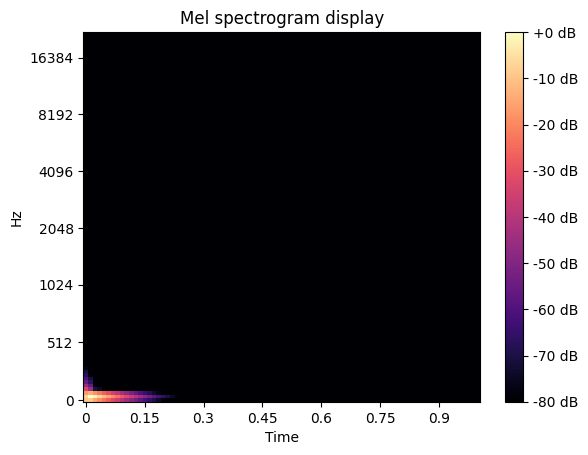

In [28]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=position, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
M_db = librosa.amplitude_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel',sr=sample_rate, x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [19]:
import IPython.display as ipd
ipd.Audio(data=position,rate=simple_rate)

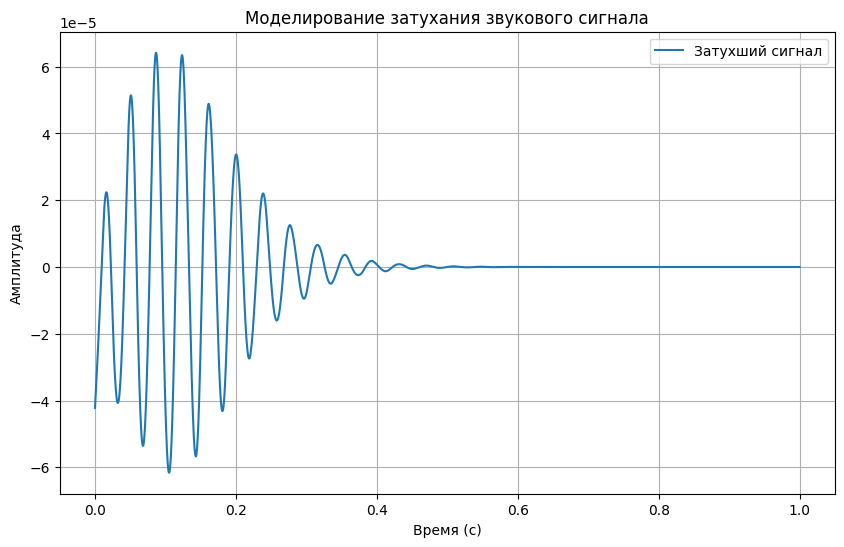

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
# Пример использования функции
frequency = 1000  # частота звука в Гц
temperature = 20  # температура воздуха в градусах Цельсия
pressure = 101325  # атмосферное давление в Па (нормальное)
humidity = 50  # относительная влажность воздуха в процентах

def sound_attenuation_coefficient(frequency, temperature, pressure, humidity):
    """
    Рассчитывает коэффициент затухания звука в воздухе по формуле Сабина-Штроёра.

    Параметры:
    - frequency: частота звука в Гц
    - temperature: температура воздуха в градусах Цельсия
    - pressure: атмосферное давление в Па
    - humidity: относительная влажность воздуха в процентах

    Возвращает:
    - коэффициент затухания в децибелах на метр
    """

    # Переводим величину в паскали и температуру в Кельвины
    pascal_pressure = pressure * 100
    kelvin_temperature = temperature + 273.15

    # Рассчитываем насыщенное паропрессионное давление (в Па)
    saturated_vapor_pressure = 610.7 * np.exp((17.38 * temperature) / (temperature + 239.5))

    # Рассчитываем давление водяного пара в воздухе (в Па)
    vapor_pressure = (humidity / 100) * saturated_vapor_pressure

    # Рассчитываем скорость звука в воздухе (в м/с)
    speed_of_sound = 331.5 * np.sqrt(1 + (temperature / 273.15)) * np.sqrt(pressure / 101325)

    # Рассчитываем аттенюацию звука (в дБ/м)
    alpha = (8 * np.pi * frequency * pascal_pressure * 1e-4) / speed_of_sound**2
    alpha += (2.1 * np.sqrt(frequency * pascal_pressure * (1 + 0.003 * temperature))) / speed_of_sound
    alpha += 0.002 * frequency

    return alpha

def apply_attenuation_spectrum(frequency_bins, attenuation_coefficients):
    """
    Применяет коэффициенты затухания к спектру сигнала.

    Параметры:
    - frequency_bins: массив частотных бинов
    - attenuation_coefficients: массив коэффициентов затухания для каждого бина

    Возвращает:
    - attenuated_spectrum: спектр с примененными коэффициентами затухания
    """
    attenuated_spectrum = np.exp(-attenuation_coefficients)  # Применяем коэффициенты затухания
    return attenuated_spectrum

# Генерируем сигнал
sr = 44100
duration = 1.0
t = np.linspace(0, duration, int(sr*duration), endpoint=False)
f = 440.0
signal = np.sin(2 * np.pi * f * t)
signal = position

# Применяем преобразование Фурье
window = get_window('hann', len(signal))
fft_size = 2048
hop_length = 512
stft_matrix = librosa.stft(signal * window, n_fft=fft_size, hop_length=hop_length)

# Получаем частотные бины
frequency_bins = librosa.fft_frequencies(sr=sr, n_fft=fft_size)

# Вычисляем коэффициенты затухания (вы можете заменить это на свою функцию расчета)
temperature = 20  # Температура воздуха в градусах Цельсия
pressure = 101325  # Атмосферное давление в Па
humidity = 50  # Относительная влажность воздуха в процентах
attenuation_coefficients = sound_attenuation_coefficient(frequency_bins, temperature, pressure, humidity)

# Применяем коэффициенты затухания к спектру
attenuated_spectrum = apply_attenuation_spectrum(frequency_bins, attenuation_coefficients)

# Умножаем спектр на коэффициенты затухания
attenuated_stft_matrix = stft_matrix * attenuated_spectrum[:, np.newaxis]

# Получаем обратное преобразование Фурье
attenuated_signal = librosa.istft(attenuated_stft_matrix, hop_length=hop_length, length=len(signal))

# Визуализация результатов
plt.figure(figsize=(10, 6))
#plt.plot(t, signal, label='Исходный сигнал')
plt.plot(t, attenuated_signal, label='Затухший сигнал')
plt.title('Моделирование затухания звукового сигнала')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import IPython.display as ipd
ipd.Audio(data=attenuated_signal,rate=simple_rate)